In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)

import pandas as pd

# Load the dataset
data = pd.read_csv('D:\\_NILESH\\dissertation\\data\\solar_wind.csv')

data.head()

,Year,Day,Hour,Minute,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000,1,0,0,6.82,0.20,99999.9,999.99,9999999.0,99.99,999.99
1,2000,1,0,1,6.99,0.16,664.7,3.12,343841.0,2.76,-0.72
2,2000,1,0,2,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000,1,0,3,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000,1,0,5,6.98,0.00,688.4,2.55,355046.0,2.42,-3.26


In [2]:
import numpy as np

# Replace placeholder values with NaN
data.replace([99999.9, 9999999.0, 999.99, 99.99], np.nan, inplace=True)

# Display the first few rows after replacement
data.head()

,Year,Day,Hour,Minute,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000,1,0,0,6.82,0.20,NaN,NaN,NaN,NaN,NaN
1,2000,1,0,1,6.99,0.16,664.7,3.12,343841.0,2.76,-0.72
2,2000,1,0,2,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000,1,0,3,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000,1,0,5,6.98,0.00,688.4,2.55,355046.0,2.42,-3.26


In [3]:
# Convert Year, Day, Hour, and Minute columns into a single datetime column
data['Datetime'] = pd.to_datetime(data[['Year', 'Day', 'Hour', 'Minute']].assign(MONTH=1, DAY=1)) + pd.to_timedelta(data['Day'] - 1, unit='d')
data.drop(['Year', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

# Reorder the columns to have 'Datetime' at the beginning
data = data[['Datetime'] + [col for col in data if col != 'Datetime']]

# Display the updated data with the new datetime column
data.head()

,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000-01-01 00:00:00,6.82,0.20,NaN,NaN,NaN,NaN,NaN
1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,343841.0,2.76,-0.72
2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,355046.0,2.42,-3.26


In [4]:
# Check data types of each column
data.dtypes

Datetime                       datetime64[ns]
Field magnitude average, nT           float64
RMS SD B scalar, nT                   float64
Speed, km/s                           float64
Proton Density, n/cc                  float64
Proton Temperature, K                 float64
Flow pressure, nPa                    float64
Electric field, mV/m                  float64
dtype: object

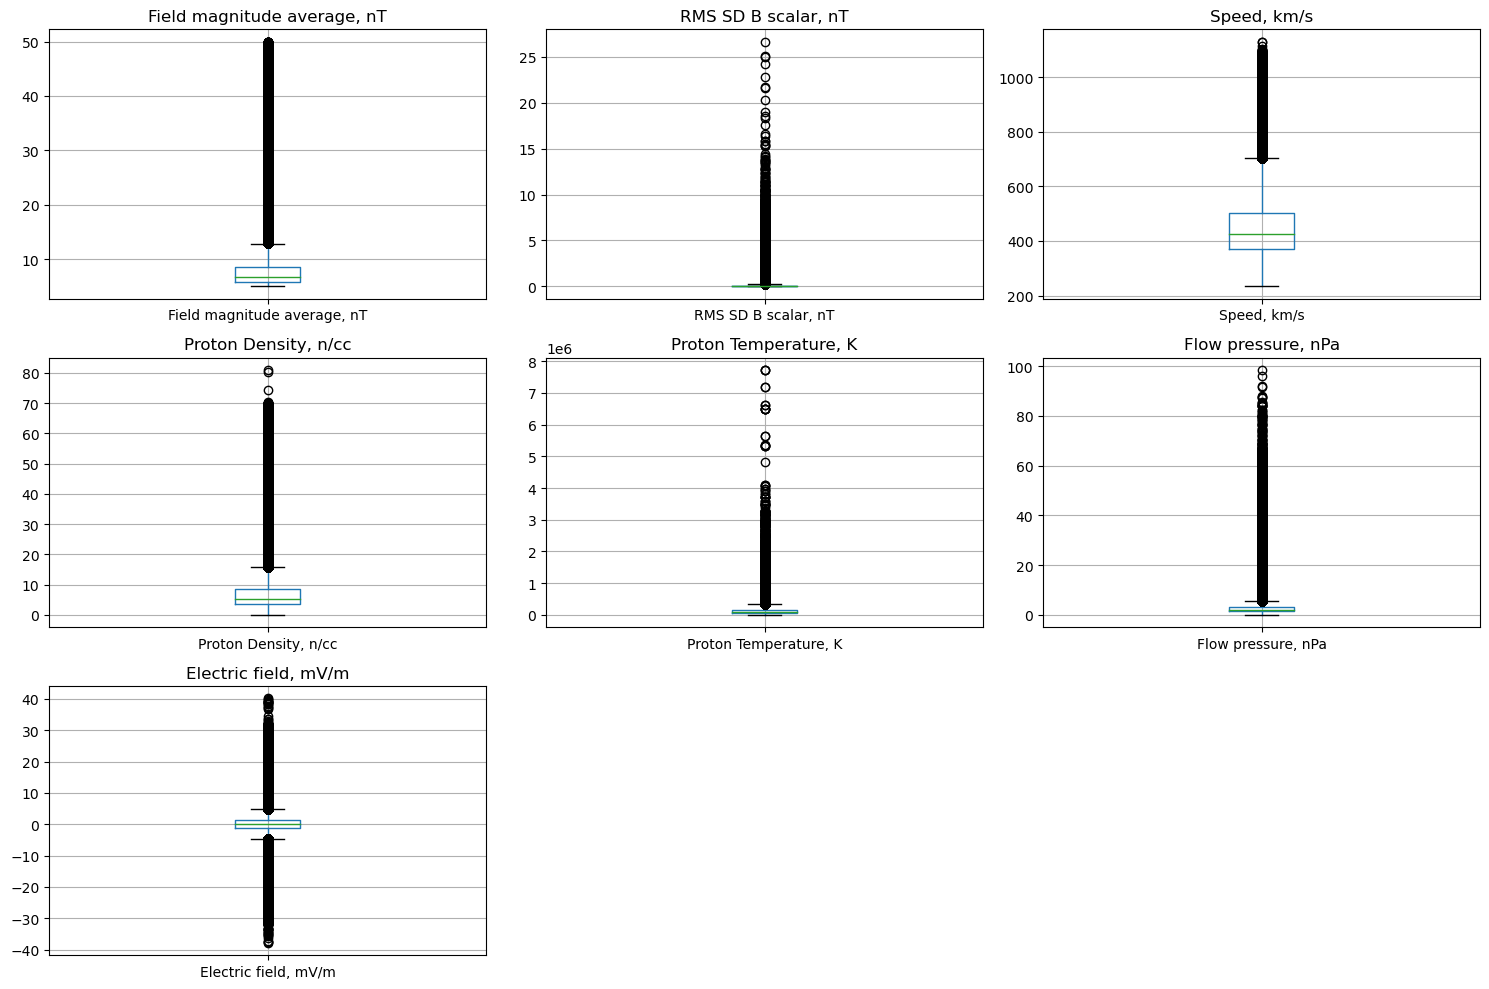

In [5]:
import matplotlib.pyplot as plt

# Plot boxplots for each numerical column to visually inspect for outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    data.boxplot(column)
    plt.title(column)
    plt.tight_layout()

plt.show()

In [6]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Number of duplicate rows
num_duplicates = len(duplicate_rows)
num_duplicates

0

In [7]:
# Check for duplicate datetime values
unique_datetime_count = data['Datetime'].nunique()
total_rows = len(data)

# Determine if there are duplicates based on the datetime column
has_duplicates = total_rows != unique_datetime_count
has_duplicates

False

To summarize:

We replaced placeholder values with NaN.
Merged the Year, Day, Hour, and Minute columns into a single datetime column.
Verified that the data types are appropriate.
Identified potential outliers through visual inspection.
Detected the presence of duplicate datetime values.

In [10]:
# Handle outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in data.columns[1:]:
    data[column] = np.where(data[column] < lower_bound[column], lower_bound[column], data[column])
    data[column] = np.where(data[column] > upper_bound[column], upper_bound[column], data[column])

# Check the first few rows after capping outliers
data.head()

,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000-01-01 00:00:00,6.82,0.20,NaN,NaN,NaN,NaN,NaN
1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26


In [11]:
# Impute Missing Values using Forward Fill
data.fillna(method='ffill', inplace=True)

# Remove Duplicate Datetime Entries
data.drop_duplicates(subset='Datetime', keep='first', inplace=True)

# Display the first few rows after processing
data.head()

,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000-01-01 00:00:00,6.82,0.20,NaN,NaN,NaN,NaN,NaN
1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26


In [12]:
# Use backward fill for the first row
data.fillna(method='bfill', inplace=True)

# Check the first few rows after backward fill
data.head()

,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000-01-01 00:00:00,6.82,0.20,664.7,3.12,329179.0,2.76,-0.72
1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26


In [13]:
data.to_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\solar_wind.csv')
data.head()

,Datetime,"Field magnitude average, nT","RMS SD B scalar, nT","Speed, km/s","Proton Density, n/cc","Proton Temperature, K","Flow pressure, nPa","Electric field, mV/m"
0,2000-01-01 00:00:00,6.82,0.20,664.7,3.12,329179.0,2.76,-0.72
1,2000-01-01 00:01:00,6.99,0.16,664.7,3.12,329179.0,2.76,-0.72
2,2000-01-01 00:02:00,6.99,0.20,663.2,3.24,326583.0,2.85,-1.49
3,2000-01-01 00:03:00,6.83,0.00,662.2,3.11,306470.0,2.73,-1.84
4,2000-01-01 00:05:00,6.98,0.00,688.4,2.55,329179.0,2.42,-3.26
